In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

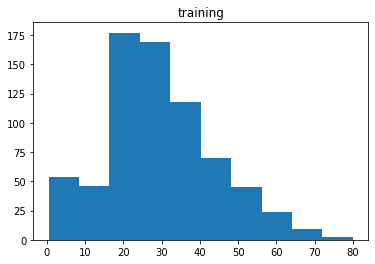

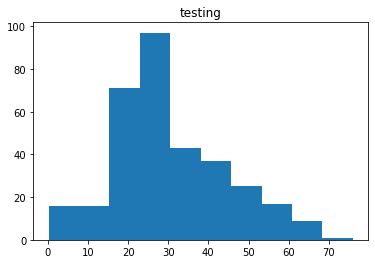

In [8]:
import matplotlib.pyplot as plt


plt.hist(train_data['Age'])
plt.title('training')
plt.show()
plt.hist(test_data['Age'])
plt.title('testing')
plt.show()

Text(0.5, 1.0, 'combined')

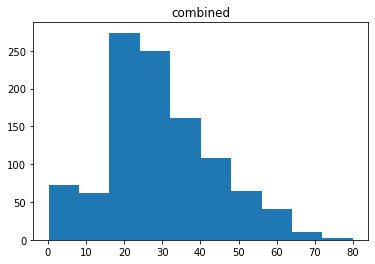

In [9]:
combined=pd.concat([train_data,test_data])
plt.hist(combined['Age'])
plt.title('combined')

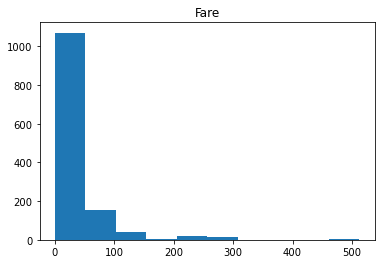

In [10]:
plt.hist(combined['Fare'])
plt.title('Fare')
plt.show()

In [11]:
#referred https://www.kaggle.com/kenjee/titanic-project-example 
#also https://www.youtube.com/watch?v=I3FBJdiExcg&list=WL&index=1&ab_channel=KenJee

print(combined.Age.mean())
print(combined.Age.median())

test_data.Fare=test_data.Fare.fillna(combined.Age.median())

train_data.Age=train_data.Age.fillna(combined.Age.mean())
test_data.Age=test_data.Age.fillna(combined.Age.mean())


print('\ntrain null val : ')
print(train_data.isnull().sum())

print('\ntest null val : ')
print(test_data.isnull().sum())

29.881137667304014
28.0

train null val : 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

test null val : 
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


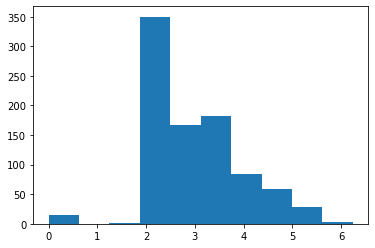

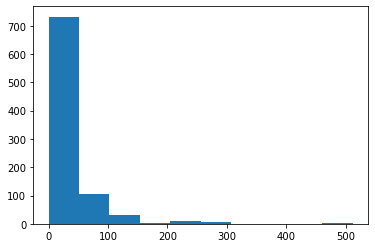

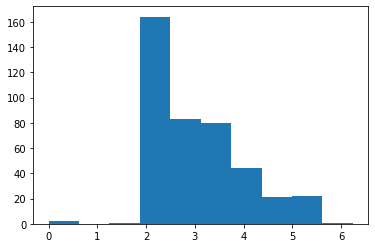

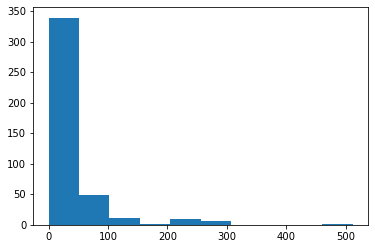

In [12]:
#referred https://www.kaggle.com/kenjee/titanic-project-example 
#also https://www.youtube.com/watch?v=I3FBJdiExcg&list=WL&index=1&ab_channel=KenJee
train_data['norm_fare']=np.log(train_data.Fare+1)
test_data['norm_fare']=np.log(test_data.Fare+1)


plt.hist(train_data['norm_fare'])
plt.show()
plt.hist(train_data['Fare'])
plt.show()
plt.hist(test_data['norm_fare'])
plt.show()
plt.hist(test_data['Fare'])
plt.show()

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch","Age","norm_fare"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)

#referred https://www.kaggle.com/kenjee/titanic-project-example 
#also https://www.youtube.com/watch?v=I3FBJdiExcg&list=WL&index=1&ab_channel=KenJee

#kn = KNeighborsClassifier()
#sv = SVC(probability = True)
#model=VotingClassifier(estimators = [('knn',kn),('rf',rf),('svm',sv)], voting = 'soft')

model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
